### In this project, I will demo using a Kaggle competition dataset (taxi trips in NYC) how to work with csv files from scratch to carry out 
1. data exploration, 
2. variable treatment, 
3. feature variable selection/transformation and 
4. multiple types of modeling. 

##### (objective of this analysis is to predict trip duration using information given with best accuracy.)

In [308]:
taxiRides = open('train.csv')

In [309]:
Lines = taxiRides.readlines()
Lines[0]

'id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration\n'

In [310]:
Lines=[(i.strip()) for i in Lines]
Lines=[i.split(',') for i in Lines]

In [311]:
import pandas as pd
rides = pd.DataFrame(Lines)

In [312]:
columns=Lines[0]
rides.columns=columns
rides=rides[1:]
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191406,40.767936706542969,-73.964630126953125,40.765602111816406,N,455
2,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238281,40.738563537597656,-73.999481201171875,40.731151580810547,N,663
3,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433594,40.763938903808594,-74.005332946777344,40.710086822509766,N,2124
4,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719970703125,-74.01226806640625,40.706718444824219,N,429
5,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209075927734,-73.972923278808594,40.782520294189453,N,435


###### After quickly reviewing all the column variables originally provided, to model trip duration, feature varirables may be derived from trip month, day of week, hour, taxi vendor, distance between origin and destination, and passenger count. Below are steps used to derive such variables if not originally available and conduct quick assessment of variable predictability.   

In [313]:
rides['year'] = rides.pickup_datetime.str.slice(0, 4)
rides['month'] = rides.pickup_datetime.str.slice(5, 7)
rides['day'] = rides.pickup_datetime.str.slice(8, 10)
rides['hour'] = rides.pickup_datetime.str.slice(11, 13)

In [314]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour
1,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191406,40.767936706542969,-73.964630126953125,40.765602111816406,N,455,2016,03,14,17
2,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238281,40.738563537597656,-73.999481201171875,40.731151580810547,N,663,2016,06,12,00
3,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433594,40.763938903808594,-74.005332946777344,40.710086822509766,N,2124,2016,01,19,11
4,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719970703125,-74.01226806640625,40.706718444824219,N,429,2016,04,06,19
5,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209075927734,-73.972923278808594,40.782520294189453,N,435,2016,03,26,13


In [315]:
rides['year']=rides['year'].apply(pd.to_numeric)
rides['month']=rides['month'].apply(pd.to_numeric)
rides['hour']=rides['hour'].apply(pd.to_numeric)
rides['trip_duration']=rides['trip_duration'].apply(pd.to_numeric)
rides['day']=rides['day'].apply(pd.to_numeric)

##### Looks like data cover first 6 months in 2016

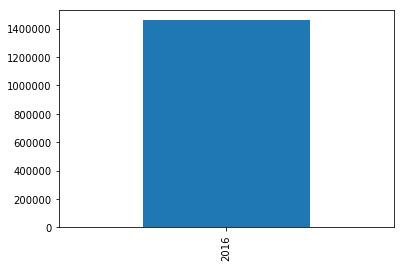

In [316]:
%matplotlib inline
rides['year'].value_counts().plot(kind='bar')

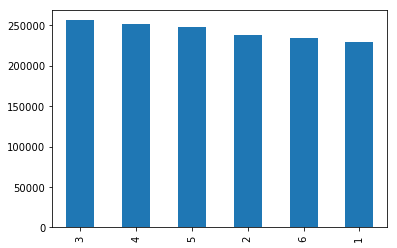

In [317]:
%matplotlib inline
rides['month'].value_counts().plot(kind='bar')

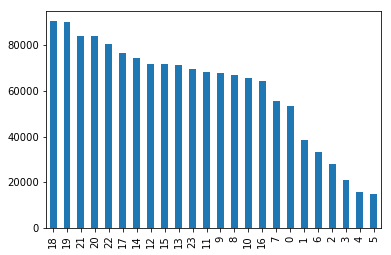

In [318]:
%matplotlib inline
rides['hour'].value_counts().plot(kind='bar')

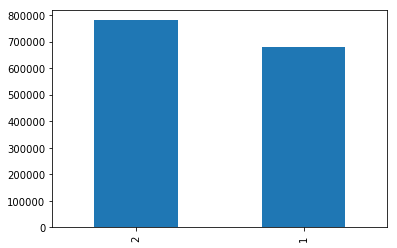

In [319]:
%matplotlib inline
rides['vendor_id'].value_counts().plot(kind='bar')

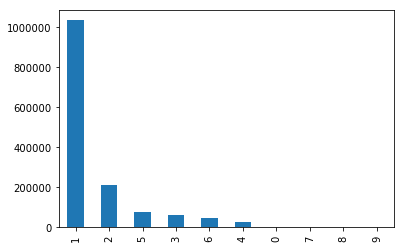

In [320]:
%matplotlib inline
rides['passenger_count'].value_counts().plot(kind='bar')

In [325]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,cumudays,dayofweek
1,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191406,40.767936706542969,-73.964630126953125,40.765602111816406,N,455,2016,3,14,17,74,1
2,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238281,40.738563537597656,-73.999481201171875,40.731151580810547,N,663,2016,6,12,0,164,7
3,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433594,40.763938903808594,-74.005332946777344,40.710086822509766,N,2124,2016,1,19,11,19,2
4,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719970703125,-74.01226806640625,40.706718444824219,N,429,2016,4,6,19,97,3
5,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209075927734,-73.972923278808594,40.782520294189453,N,435,2016,3,26,13,86,6


In [324]:
rides['cumudays']=rides['day']
rides['cumudays']=np.where(rides['month']==1,rides['day'],rides['cumudays'])
rides['cumudays']=np.where(rides['month']==2,31+rides['day'],rides['cumudays'])
rides['cumudays']=np.where(rides['month']==3,31+29+rides['day'],rides['cumudays'])
rides['cumudays']=np.where(rides['month']==4,31+29+31+rides['day'],rides['cumudays'])
rides['cumudays']=np.where(rides['month']==5,31+29+31+30+rides['day'],rides['cumudays'])
rides['cumudays']=np.where(rides['month']==6,31+29+31+30+31+rides['day'],rides['cumudays'])
rides['dayofweek']=(rides['cumudays']%7+4)%7
rides['dayofweek']=np.where(rides['dayofweek']==0,7,rides['dayofweek'])

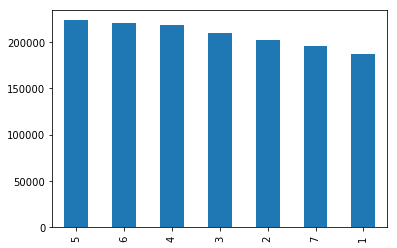

In [326]:
%matplotlib inline
rides['dayofweek'].value_counts().plot(kind='bar')

In [327]:
rides['passenger_cat']='3'
rides['passenger_cat']=np.where(rides['passenger_count']=='2', '2', rides['passenger_cat'])
rides['passenger_cat']=np.where(rides['passenger_count']=='1', '1', rides['passenger_cat'])

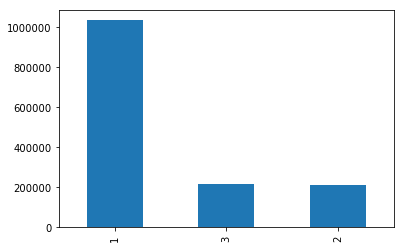

In [328]:
%matplotlib inline
rides['passenger_cat'].value_counts().plot(kind='bar')

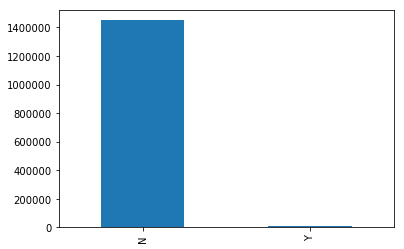

In [329]:
%matplotlib inline
rides['store_and_fwd_flag'].value_counts().plot(kind='bar')

##### Now we want to focus on the only two continuous variables trip duration and distance (derived below). We need to check on the variable distribution and potential correlation between the two. Since the data didn't provide actualy path taken for the taxi trip, we use haversine distance between pickup and dropoff as surrogate measure for actual distance. 

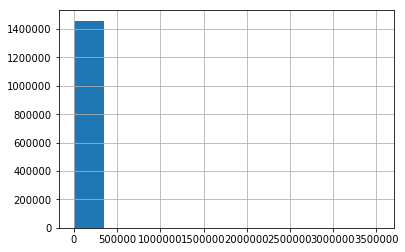

In [330]:
%matplotlib inline
rides.trip_duration.hist()
plt.show()

In [331]:
rides['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [338]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [339]:
rides['pickup_longitude']=rides['pickup_longitude'].apply(pd.to_numeric)
rides['pickup_latitude']=rides['pickup_latitude'].apply(pd.to_numeric)
rides['dropoff_longitude']=rides['dropoff_longitude'].apply(pd.to_numeric)
rides['dropoff_latitude']=rides['dropoff_latitude'].apply(pd.to_numeric)
rides['distance'] = haversine(rides['pickup_longitude'],rides['pickup_latitude'],rides['dropoff_longitude'],rides['dropoff_latitude'])

C:\Users\bonos\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


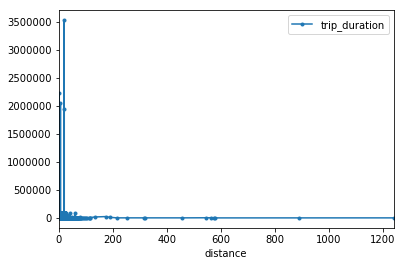

In [340]:
rides2=rides.sort(['distance'])
rides2.plot(x='distance', y='trip_duration', marker='.')

##### When we plotted trip duration against distance (seen above), some extreme outliers stood out to have occurred to both variables. Therefore below we will check quickly quantiles of distance and trip duration to cap and floor at a reasonable level so impact of extreme outliers is eliminated. 

In [350]:
rides['distance'].quantile(1)

20.77

In [351]:
rides['trip_duration'].quantile(1)

3440.0

In [349]:
rides['distance']=np.where(rides['distance']<=0.139,0.139,rides['distance'])
rides['distance']=np.where(rides['distance']>=20.77,20.77,rides['distance'])
rides['trip_duration']=np.where(rides['trip_duration']<=87,87,rides['trip_duration'])
rides['trip_duration']=np.where(rides['trip_duration']>=3440,3440,rides['trip_duration'])

##### Comparing the distance, trip duration plots from before and after outlier treatment shows a significant improvement in exhibiting the relationship between the two. Overall, there is an increasing linear relationship between distance and trip duration. But since the real distance could be much longer than haversine distance due to path taken there is a trememdous variation in trip duration for each level of distance. Moreover, traffic condition could also play a role in how long a taxi trip takes. So we will include time and trip related variables as mentioned earlier in the model hoping to account for some of such variation. 

C:\Users\bonos\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


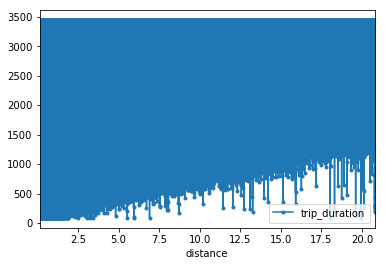

In [352]:
rides2=rides.sort(['distance'])
rides2.plot(x='distance', y='trip_duration', marker='.')

##### Next we will create dummy variables based off category variables such as month, day of week, vendor and passenger count. 

In [353]:
cat_vars=['vendor_id','month','hour','dayofweek','passenger_cat']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(rides[var], prefix=var)
    rides1=rides.join(cat_list)
    rides=rides1

cat_vars=['vendor_id','month','hour','dayofweek','passenger_cat']
data_vars=rides.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [354]:
rides_final=rides[to_keep]
rides_final.columns.values

array(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'year',
       'day', 'cumudays', 'distance', 'vendor_id_1', 'vendor_id_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'dayofweek_7', 'passenger_cat_1',
       'passenger_cat_2', 'passenger_cat_3'], dtype=object)

In [355]:
rides_final=rides_final.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'day', 'cumudays','store_and_fwd_flag','trip_duration'], 1)
y=['trip_duration']
rides_final_vars=rides_final.columns.values.tolist()
X=[i for i in rides_final_vars]

##### Now let's split the data to train and test and fit a gradient boosting model with 20 estimators. 

In [357]:
rides=rides.reset_index(drop=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rides[X], rides[y], test_size=0.33, random_state=42)

In [359]:
y_train=y_train.values

In [360]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 20, 'max_depth': 6,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}
clf = GradientBoostingRegressor(**params).fit(X_train, y_train)

C:\Users\bonos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [361]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE_test: %.4f" % mse)
mseT = mean_squared_error(y_train, clf.predict(X_train))
print("MSE_train: %.4f" % mseT)

MSE_test: 137820.0243
MSE_train: 137122.5671


In [368]:
y_pred = clf.predict(X_train)

In [380]:
yyplotx = pd.DataFrame(y_train)
yyploty = pd.DataFrame(y_pred)
yyplot=pd.concat([yyplotx,yyploty], axis=1)
yyplot.columns=['y_train', 'y_pred']
yyplot.head()

,y_train,y_pred
0,351,339.543002
1,1003,977.101994
2,2269,2347.980439
3,328,312.026657
4,3440,1332.198845


C:\Users\bonos\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


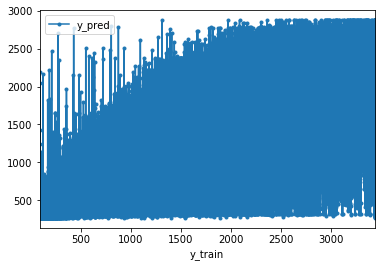

In [381]:
yyplot=yyplot.sort(['y_train'])
yyplot.plot(x='y_train', y='y_pred', marker='.')

In [382]:
yyplot['aperror']=abs(yyplot['y_train']-yyplot['y_pred'])/yyplot['y_train']

##### We use a measure called mean absolute percent error (MAPE) to assess the goodness of fit of the model. For a gradient boosting model with 20 estimators MAPE is observed to be 41.7% which means on average model prediction has an inaccuracy close to 42% of actual observation. 

In [385]:
yyplot['aperror'].mean()

0.41730028870240193

In [386]:
yyplot['aperror'].describe()

count    9.772910e+05
mean     4.173003e-01
std      4.959970e-01
min      9.444290e-08
25%      1.296555e-01
50%      2.756897e-01
75%      4.977003e-01
max      2.421486e+01
Name: aperror, dtype: float64